In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
import csv
import os
from pprint import pprint
from pandas.io.json import json_normalize

In [3]:
df = pd.read_csv("CSV Folder/Poverty_by_state_2018.csv")
df.rename( columns={'new column name':'State'}, inplace=True )
df.head()

Unnamed: 0  Percent in Poverty (All)  90% CI Lower  90%CI Upper  \
0     Alabama                      16.8          16.5         17.1   
1      Alaska                      11.1          10.5         11.7   
2     Arizona                      14.1          13.8         14.4   
3    Arkansas                      16.8          16.3         17.3   
4  California                      12.8          12.7         12.9   

   Children ages 0-17 in Poverty  90% CI Lower.1  90%CI Upper.1  
0                           23.9            23.2           24.6  
1                           14.5            13.4           15.6  
2                           20.4            19.7           21.1  
3                           23.8            22.8           24.8  
4                           17.4            17.1           17.7

In [4]:
df_pop = pd.read_csv("CSV Folder\\SCPRC-EST2019-18+POP-RES.csv")
df_pop= df_pop[["NAME", "POPESTIMATE2019","POPEST18PLUS2019","PCNT_POPEST18PLUS"]]
df_pop = df_pop.rename(columns = {"Name": "State","POPESTIMATE2019":"2019 Pop Est","POPEST18PLUS2019":"2019 18+","PCNT_POPEST18PLUS":"Percent 18+"})

In [5]:
# URL for GET requests to retrieve global count data and all countries data COUNTRIES
url1 = "https://coronavirus-19-api.herokuapp.com/all"
response = requests.get(url1)
print(response.json())
All_data = json_normalize(response.json(), errors='ignore')
print(All_data)

# uploading cases/deaths by country and formatting dataframe
url2 = "https://coronavirus-19-api.herokuapp.com/countries"
response2 = requests.get(url2)
Countries_df = json_normalize(response2.json(), errors='ignore')
Countries_df = Countries_df.iloc[:,[0,1,2,3,4,5,6,7]] 

#imported data on SES and created a dataframe
globses = pd.read_csv("CSV Folder/GLOB.csv", encoding = 'latin-1')
globses = globses[globses["year"]==2010]
globses = globses.reset_index(drop = True)

#merged ses data with countries Covid Data
combined_Countries_df_data = pd.merge(Countries_df, globses, how="left", on=["country", "country"])  
combined_Countries_df_data.dropna(inplace =True) 
combined_Countries_df_data.reset_index(inplace = True, drop = True) 

#Clean up column header names
combined_Countries_df_data.rename(columns = {"country":"Country",
                           "cases":"Total Cases",
                           "todayCases":"Cases Today",
                           "deaths": "Deaths",
                           "todayDeaths":"Deaths Today",
                           "recovered":"Total Recovered",
                           "active":"Active Cases",
                           "critical": "Critical",
                           "gdppc": "GDP per Capita",
                           "yrseduc":"Avg Years Education"}, inplace = True)

#read in government type file and inner merge on country
gov_df = pd.read_csv("CSV Folder/Gov_type.csv")
combined_Countries_df_data2 = combined_Countries_df_data.merge(gov_df, how="inner", on="Country") 
#print(combined_Countries_df_data) use this for the pie chart

{'cases': 2748984, 'deaths': 192155, 'recovered': 757775}
     cases  deaths  recovered
0  2748984  192155     757775


C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """
C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


In [6]:
combined_Countries_df_data2.head(12)
top_10 =combined_Countries_df_data2[combined_Countries_df_data2["Total Cases"]>22000]
top_10

Country  Total Cases  Cases Today  Deaths  Deaths Today  \
0         Spain       219764         6740   22524           367   
1         Italy       189973            0   25549             0   
2        France       158183            0   21856             0   
3       Germany       153393          264    5575             0   
4        Turkey       101790            0    2491             0   
5          Iran        88194         1168    5574            93   
6        Brazil        50230          738    3343            30   
7       Belgium        44293         1496    6679           189   
8        Canada        42110            0    2147             0   
9   Switzerland        28677          181    1551             2   
10        India        23502          463     722             1   
11     Portugal        22353            0     820             0   

    Total Recovered  Active Cases  Critical   unid wbid    year        SES  \
0           92355.0        104885      7705  724.0  ESP  2010.0  85.359718   
1           57576.0        106848      2267  380.0  ITA  2010.0  85.016357   
2           42088.0         94239      5053  250.0  FRA  2010.0  88.194969   
3          106800.0         41018      2908  276.0  DEU  2010.0  92.546394   
4           18491.0         80808      1816  792.0  TUR  2010.0  60.248875   
5           66599.0         16021      3121  364.0  IRN  2010.0  76.485092   
6           26573.0         20314      8318   76.0  BRA  2010.0  61.067955   
7           10122.0         27492       970   56.0  BEL  2010.0  89.668945   
8           14761.0         25202       557  124.0  CAN  2010.0  93.772118   
9           20600.0          6526       386  756.0  CHE  2010.0  91.012245   
10           5012.0         17768         0  356.0  IND  2010.0  22.542639   
11           1201.0         20332       204  620.0  PRT  2010.0  68.019989   

    GDP per Capita  Avg Years Education  popshare  \
0       32506.4340              10.3821  0.006912   
1       36201.1600               9.5096  0.008797   
2       36872.2270              10.5329  0.009650   
3       40428.7230              11.8231  0.012136   
4       17076.6050               7.0157  0.010731   
5       17517.4340               8.5859  0.011019   
6       14405.9310               7.5391  0.029474   
7       41086.5510              10.5453  0.001617   
8       40699.3550              12.0827  0.005046   
9       55541.6720               9.8763  0.001161   
10       4404.5376               5.1297  0.182679   
11      27238.4610               7.9929  0.001569   

                                      Government Type  
0               parliamentary constitutional monarchy  
1                              parliamentary republic  
2                          semi-presidential republic  
3                      federal parliamentary republic  
4                               presidential republic  
5                                 theocratic republic  
6                       federal presidential republic  
7   federal parliamentary democracy under a consti...  
8   federal parliamentary democracy (Parliament of...  
9         federal republic (formally a confederation)  
10                     federal parliamentary republic  
11                         semi-presidential republic

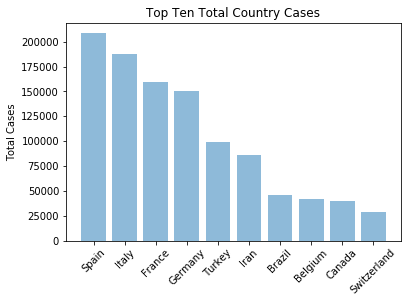

In [7]:
#Mat Bar Graph

x_axis = ('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','Switzerland')
y_pos = np.arange(len(x_axis))
y_axis = (208389,187327,159877,150062,98674,85996,45757,41889,39813,28268)
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xticks(y_pos, x_axis, rotation = 45)
plt.ylabel('Total Cases')
plt.title('Top Ten Total Country Cases')

plt.show()

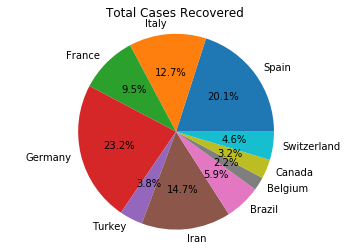

In [8]:
#Mat Pie Graph

labels =('Spain','Italy','France','Germany','Turkey','Iran','Brazil','Belgium','Canada','Switzerland')
cases_recovered = (85915,54543,40657,99400,16477,63113,25318,9433,13647,19900)
plt.pie(cases_recovered,labels=labels,autopct='%1.1f%%')
plt.title('Total Cases Recovered')
plt.axis('equal')
plt.show()

In [9]:
combined_Countries_df_data2.head(12)

Country  Total Cases  Cases Today  Deaths  Deaths Today  \
0         Spain       219764         6740   22524           367   
1         Italy       189973            0   25549             0   
2        France       158183            0   21856             0   
3       Germany       153393          264    5575             0   
4        Turkey       101790            0    2491             0   
5          Iran        88194         1168    5574            93   
6        Brazil        50230          738    3343            30   
7       Belgium        44293         1496    6679           189   
8        Canada        42110            0    2147             0   
9   Switzerland        28677          181    1551             2   
10        India        23502          463     722             1   
11     Portugal        22353            0     820             0   

    Total Recovered  Active Cases  Critical   unid wbid    year        SES  \
0           92355.0        104885      7705  724.0  ESP  2010.0  85.359718   
1           57576.0        106848      2267  380.0  ITA  2010.0  85.016357   
2           42088.0         94239      5053  250.0  FRA  2010.0  88.194969   
3          106800.0         41018      2908  276.0  DEU  2010.0  92.546394   
4           18491.0         80808      1816  792.0  TUR  2010.0  60.248875   
5           66599.0         16021      3121  364.0  IRN  2010.0  76.485092   
6           26573.0         20314      8318   76.0  BRA  2010.0  61.067955   
7           10122.0         27492       970   56.0  BEL  2010.0  89.668945   
8           14761.0         25202       557  124.0  CAN  2010.0  93.772118   
9           20600.0          6526       386  756.0  CHE  2010.0  91.012245   
10           5012.0         17768         0  356.0  IND  2010.0  22.542639   
11           1201.0         20332       204  620.0  PRT  2010.0  68.019989   

    GDP per Capita  Avg Years Education  popshare  \
0       32506.4340              10.3821  0.006912   
1       36201.1600               9.5096  0.008797   
2       36872.2270              10.5329  0.009650   
3       40428.7230              11.8231  0.012136   
4       17076.6050               7.0157  0.010731   
5       17517.4340               8.5859  0.011019   
6       14405.9310               7.5391  0.029474   
7       41086.5510              10.5453  0.001617   
8       40699.3550              12.0827  0.005046   
9       55541.6720               9.8763  0.001161   
10       4404.5376               5.1297  0.182679   
11      27238.4610               7.9929  0.001569   

                                      Government Type  
0               parliamentary constitutional monarchy  
1                              parliamentary republic  
2                          semi-presidential republic  
3                      federal parliamentary republic  
4                               presidential republic  
5                                 theocratic republic  
6                       federal presidential republic  
7   federal parliamentary democracy under a consti...  
8   federal parliamentary democracy (Parliament of...  
9         federal republic (formally a confederation)  
10                     federal parliamentary republic  
11                         semi-presidential republic

In [13]:
# reaching out to API to get current overall state data pertaining to cases, tests, hospitalizations, and deaths
url3 = "https://covidtracking.com/api/states"
response3 = requests.get(url3)
#Turned entire response into a dataframe
US_df = json_normalize(response3.json(), errors='ignore')
#Narrowed df to specific columns of interest 
US_df = US_df.iloc[:,[0,1,8,9,22,16,10,19]]

#Read in a State Name Abbrev CSV so that df's could be joined with different state naming conventions
st_abrev = pd.read_csv("CSV Folder/Covid Analysis Data - StateNameAbrev.csv")

# Replacing the state abbreviation with names for joining to other data
tests_df = st_abrev.merge(US_df, how = 'inner',left_on = "Abbreviation",right_on = "state")

#Droping abbreviation column since no other dataset used abbrev.
tests_df.drop(columns = ["Abbreviation","state"],inplace = True)

#Read in the Poverty Data File and Population Data File
df = pd.read_csv("CSV Folder/Poverty by state 2018.csv")
pop_df = pd.read_csv("CSV Folder/SCPRC-EST2019-18+POP-RES.csv")

#Select and rename columns of interest for merging
df.rename( columns={'Unnamed: 0':'State'}, inplace=True )
pop_df= pop_df[["NAME", "POPESTIMATE2019","POPEST18PLUS2019","PCNT_POPEST18PLUS"]]
pop_df = pop_df.rename(columns = {"NAME": "State","POPESTIMATE2019":"2019 Pop Est","POPEST18PLUS2019":"2019 18+","PCNT_POPEST18PLUS":"Percent 18+"})

#Merge the poverty and population df's and then merge with the state tests_df
poverty_df = pop_df.merge(df,how = 'inner',on = "State")
pov_death = tests_df.merge(poverty_df,how = 'inner', on = "State")

pov_death.head()

pov_death.sort_values("Percent in Poverty (All)", ascending = False).head()
bins = (0,10,11,12,13,14,15,16,17,20)
labels = ("< 10","10-10.99","11-11.99","12-12.99","13-13.99","14-14.99","15-15.99","16-16.99","> 17")
pov_death["Poverty Groups"] = pd.cut(x = pov_death["Percent in Poverty (All)"], bins = bins, labels = labels)
pov_death.rename(columns = {"death":"Deaths","positive":"Cases","negative":"Negative Tests","totalTestResults":"Total Tests"},inplace=True)
pov_death.head()

C:\Users\walsh\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


State  positive  negative  pending  totalTestResults  recovered  \
0     Alabama      5832     46863      NaN             52695        NaN   
1      Alaska       337     11824      NaN             12161      209.0   
2     Arizona      5769     52928      NaN             58697     1282.0   
3    Arkansas      2465     29125      NaN             31590      902.0   
4  California     37369    444728      NaN            482097        NaN   

   hospitalizedCurrently   death  2019 Pop Est  2019 18+  Percent 18+  \
0                    NaN   197.0       4903185   3814879         77.8   
1                   42.0     9.0        731545    551562         75.4   
2                  699.0   249.0       7278717   5638481         77.5   
3                  101.0    45.0       3017804   2317649         76.8   
4                 4929.0  1469.0      39512223  30617582         77.5   

   Percent in Poverty (All)  90% CI Lower  90%CI Upper  \
0                      16.8          16.5         17.1   
1                      11.1          10.5         11.7   
2                      14.1          13.8         14.4   
3                      16.8          16.3         17.3   
4                      12.8          12.7         12.9   

   Children ages 0-17 in Poverty  90% CI Lower.1  90%CI Upper.1  
0                           23.9            23.2           24.6  
1                           14.5            13.4           15.6  
2                           20.4            19.7           21.1  
3                           23.8            22.8           24.8  
4                           17.4            17.1           17.7